In [1]:
!pip install sweetviz

In [2]:
#!pip install pandas-profiling
#!pip install --upgrade numba 
#!pip install --upgrade pandas-profiling

In [3]:
import numpy as np
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data1=sns.load_dataset("iris")
data1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data2=data1.iloc[:,1:]

In [8]:
data2.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [9]:
data=pd.read_csv("data_clean.csv")
data.head(11)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
5,6,28.0,NaN,14.9,66,5,6,2010,66,C
6,7,23.0,299.0,8.6,65,5,7,2010,65,PS
7,8,19.0,99.0,13.8,59,5,8,2010,59,C
8,9,8.0,19.0,20.1,61,5,9,2010,61,PS
9,10,NaN,194.0,8.6,69,5,10,2010,69,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [11]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')
data['Weather']=data['Weather'].astype('category')
data['Wind']=data['Wind'].astype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    int64   
 4   Temp C      157 non-null    float64 
 5   Month       157 non-null    float64 
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(4), int64(5)
memory usage: 11.5 KB


In [13]:
data.head(11)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14,56.0,5.0,5,2010,56,S
5,6,28.0,NaN,14,66.0,5.0,6,2010,66,C
6,7,23.0,299.0,8,65.0,5.0,7,2010,65,PS
7,8,19.0,99.0,13,59.0,5.0,8,2010,59,C
8,9,8.0,19.0,20,61.0,5.0,9,2010,61,PS
9,10,NaN,194.0,8,69.0,5.0,10,2010,69,S


In [14]:
data[data.duplicated()].shape

(0, 10)

In [15]:
data.drop_duplicates().shape

(158, 10)

In [16]:
data_cleaned1=data.drop('Temp C',axis=1)
data_cleaned1.head() 

,Unnamed: 0,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7,5.0,1,2010,67,S
1,2,36.0,118.0,8,5.0,2,2010,72,C
2,3,12.0,149.0,12,5.0,3,2010,74,PS
3,4,18.0,313.0,11,5.0,4,2010,62,S
4,5,NaN,NaN,14,5.0,5,2010,56,S


In [17]:
data_cleaned1=data_cleaned1.rename({'Solar.R': 'Solar'}, axis=1)
data_cleaned1.head()

,Unnamed: 0,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7,5.0,1,2010,67,S
1,2,36.0,118.0,8,5.0,2,2010,72,C
2,3,12.0,149.0,12,5.0,3,2010,74,PS
3,4,18.0,313.0,11,5.0,4,2010,62,S
4,5,NaN,NaN,14,5.0,5,2010,56,S


In [18]:
data_cleaned1=data_cleaned1.drop('Unnamed: 0',axis=1)
data_cleaned1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7,5.0,1,2010,67,S
1,36.0,118.0,8,5.0,2,2010,72,C
2,12.0,149.0,12,5.0,3,2010,74,PS
3,18.0,313.0,11,5.0,4,2010,62,S
4,NaN,NaN,14,5.0,5,2010,56,S


In [19]:
data_cleaned1[data_cleaned1.duplicated()]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14,9.0,28,2010,75,S


<Axes: >

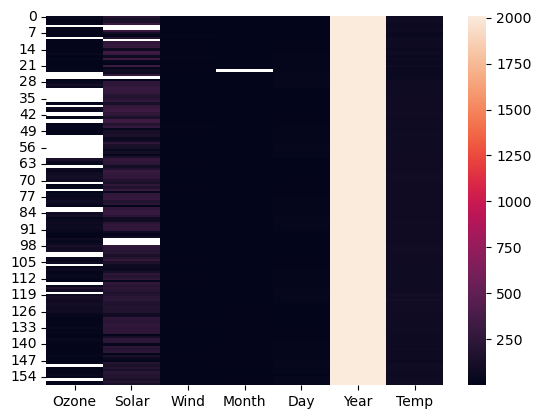

In [20]:
numeric_columns = data_cleaned1.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns)

In [21]:
corr=numeric_columns.corr()
corr

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.348642,-0.585735,0.137356,-0.035055,NaN,0.694098
Solar,0.348642,1.000000,-0.066157,-0.092918,-0.154212,NaN,0.273322
Wind,-0.585735,-0.066157,1.000000,-0.154096,0.054972,NaN,-0.444768
Month,0.137356,-0.092918,-0.154096,1.000000,0.061236,NaN,0.393321
Day,-0.035055,-0.154212,0.054972,0.061236,1.000000,NaN,-0.124538
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.694098,0.273322,-0.444768,0.393321,-0.124538,NaN,1.000000


<Axes: >

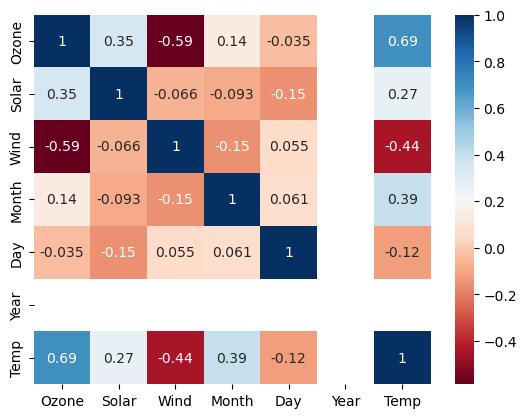

In [22]:
sns.heatmap(corr,cmap='RdBu',annot=True)

In [23]:
corr['Ozone'].sort_values(ascending = False)

Ozone    1.000000
Temp     0.694098
Solar    0.348642
Month    0.137356
Day     -0.035055
Wind    -0.585735
Year          NaN
Name: Ozone, dtype: float64

In [24]:
data_cleaned1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [25]:
data_cleaned1.describe()

,Ozone,Solar,Wind,Month,Day,Year,Temp
count,120.000000,151.000000,158.000000,157.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.481013,7.044586,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.483759,1.433768,8.997166,0.0,9.377877
min,1.000000,7.000000,1.000000,5.000000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.000000,6.000000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.000000,7.000000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.750000,8.000000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.000000,9.000000,31.000000,2010.0,97.000000


In [26]:
def fill_with_median(df, columns):
    median = df[columns].median()
    df[columns]=df[columns].fillna(median)

fill_with_median(data_cleaned1, ['Ozone', 'Solar', 'Month'])
data_cleaned1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [27]:
mode=data_cleaned1['Weather'].mode().iloc[0]
data_cleaned1['Weather']=data_cleaned1['Weather'].fillna(mode)
data_cleaned1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

<Axes: >

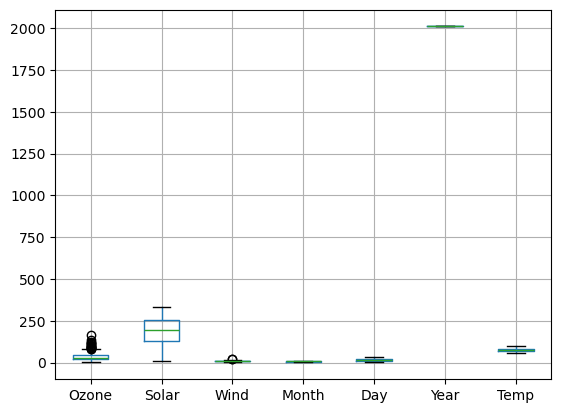

In [28]:
data_cleaned1.boxplot()

In [29]:
data_cleaned1['Weather'].value_counts() 

Weather
S     62
C     49
PS    47
Name: count, dtype: int64

<Axes: >

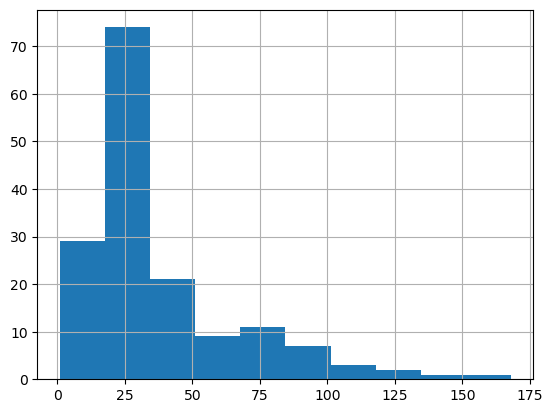

In [30]:
data_cleaned1['Ozone'].hist()

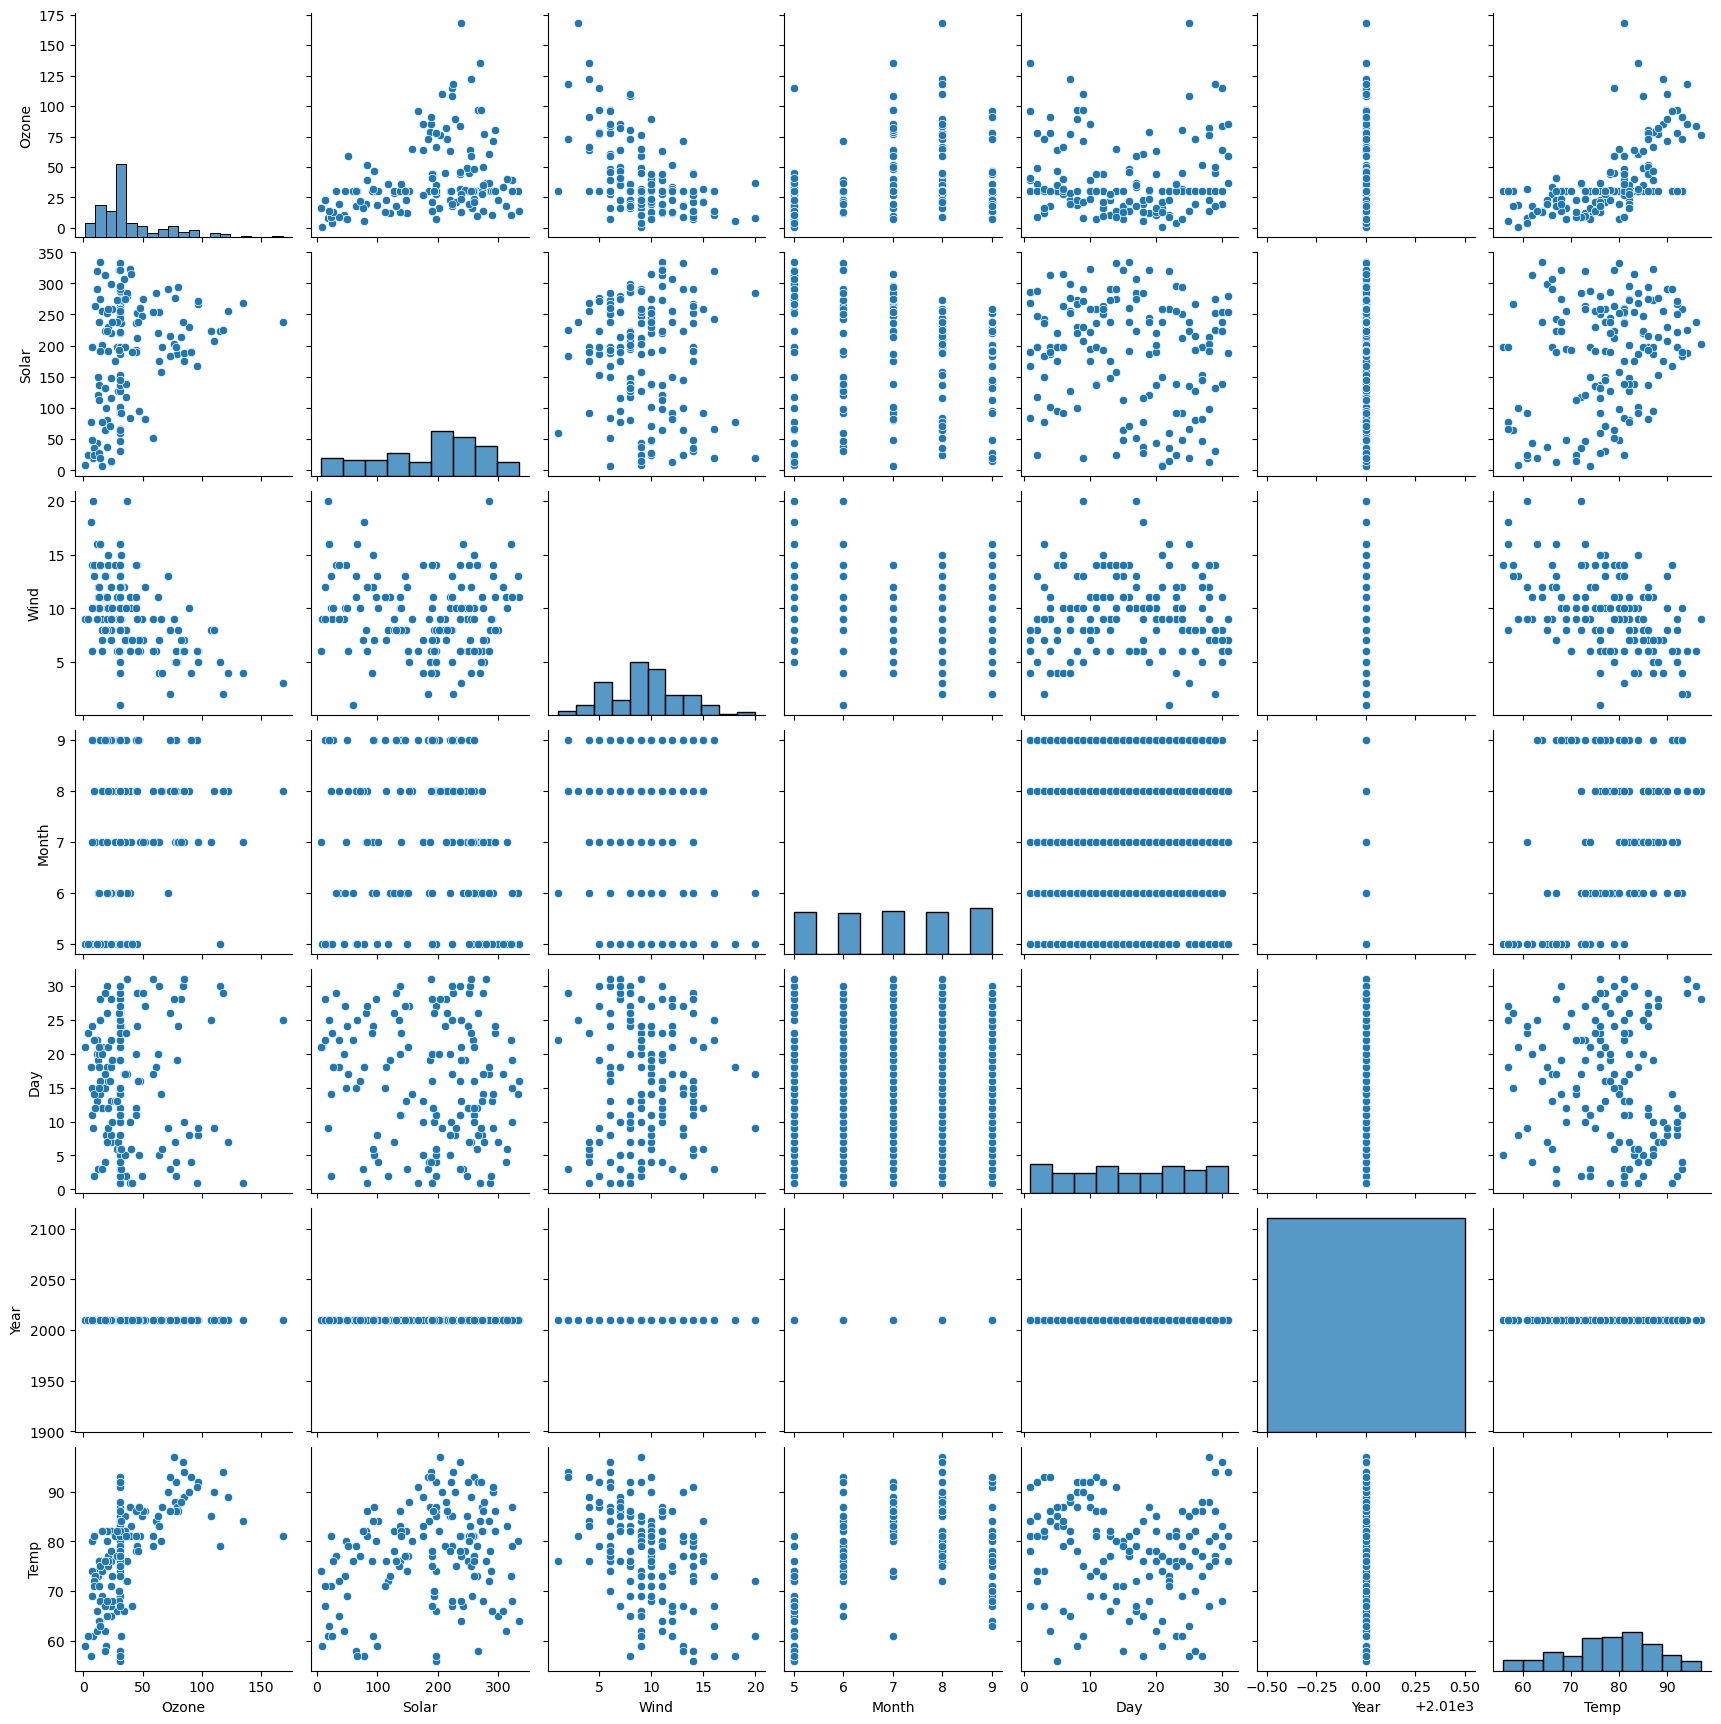

In [31]:
sns.pairplot(data_cleaned1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns= data_cleaned1.select_dtypes(include='number')
numeric_columns= scaler.fit_transform(numeric_columns)

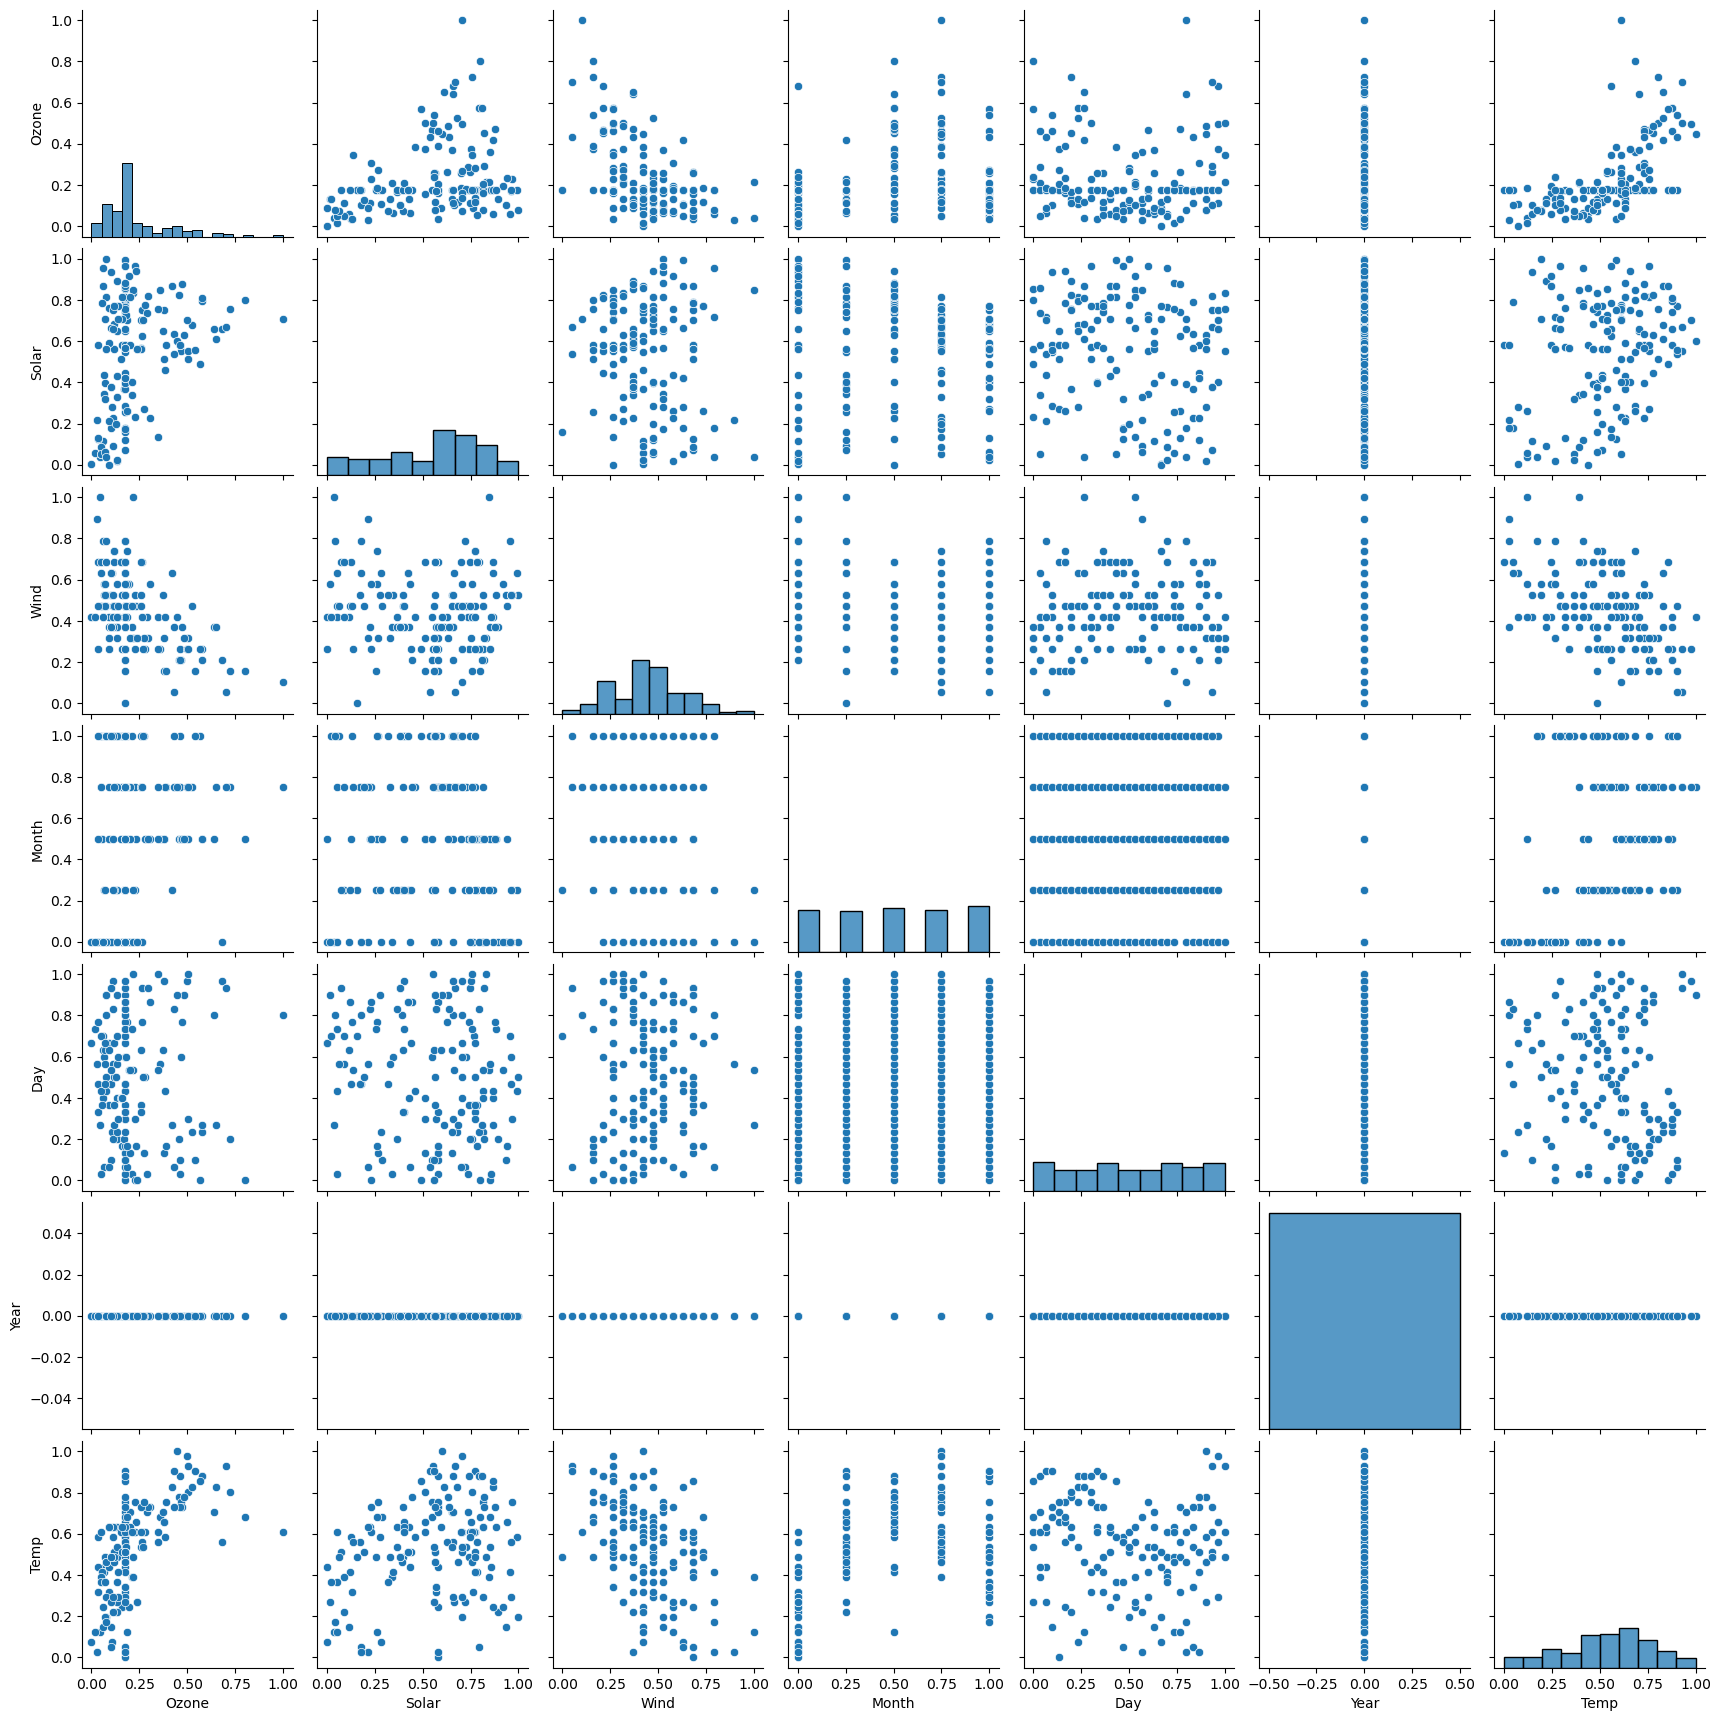

In [33]:
normalization_df = pd.DataFrame(numeric_columns,columns=['Ozone','Solar','Wind','Month','Day','Year','Temp'])
sns.pairplot(normalization_df)

In [34]:
normalization_df.describe()

,Ozone,Solar,Wind,Month,Day,Year,Temp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.0,158.000000
mean,0.227052,0.547149,0.446369,0.511076,0.500211,0.0,0.529948
std,0.172424,0.265308,0.183356,0.357300,0.299906,0.0,0.228729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.119760,0.366972,0.315789,0.250000,0.233333,0.0,0.390244
50%,0.176647,0.581040,0.421053,0.500000,0.500000,0.0,0.548780
75%,0.263473,0.758410,0.565789,0.750000,0.766667,0.0,0.682927
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns= scaler.fit_transform(numeric_columns)

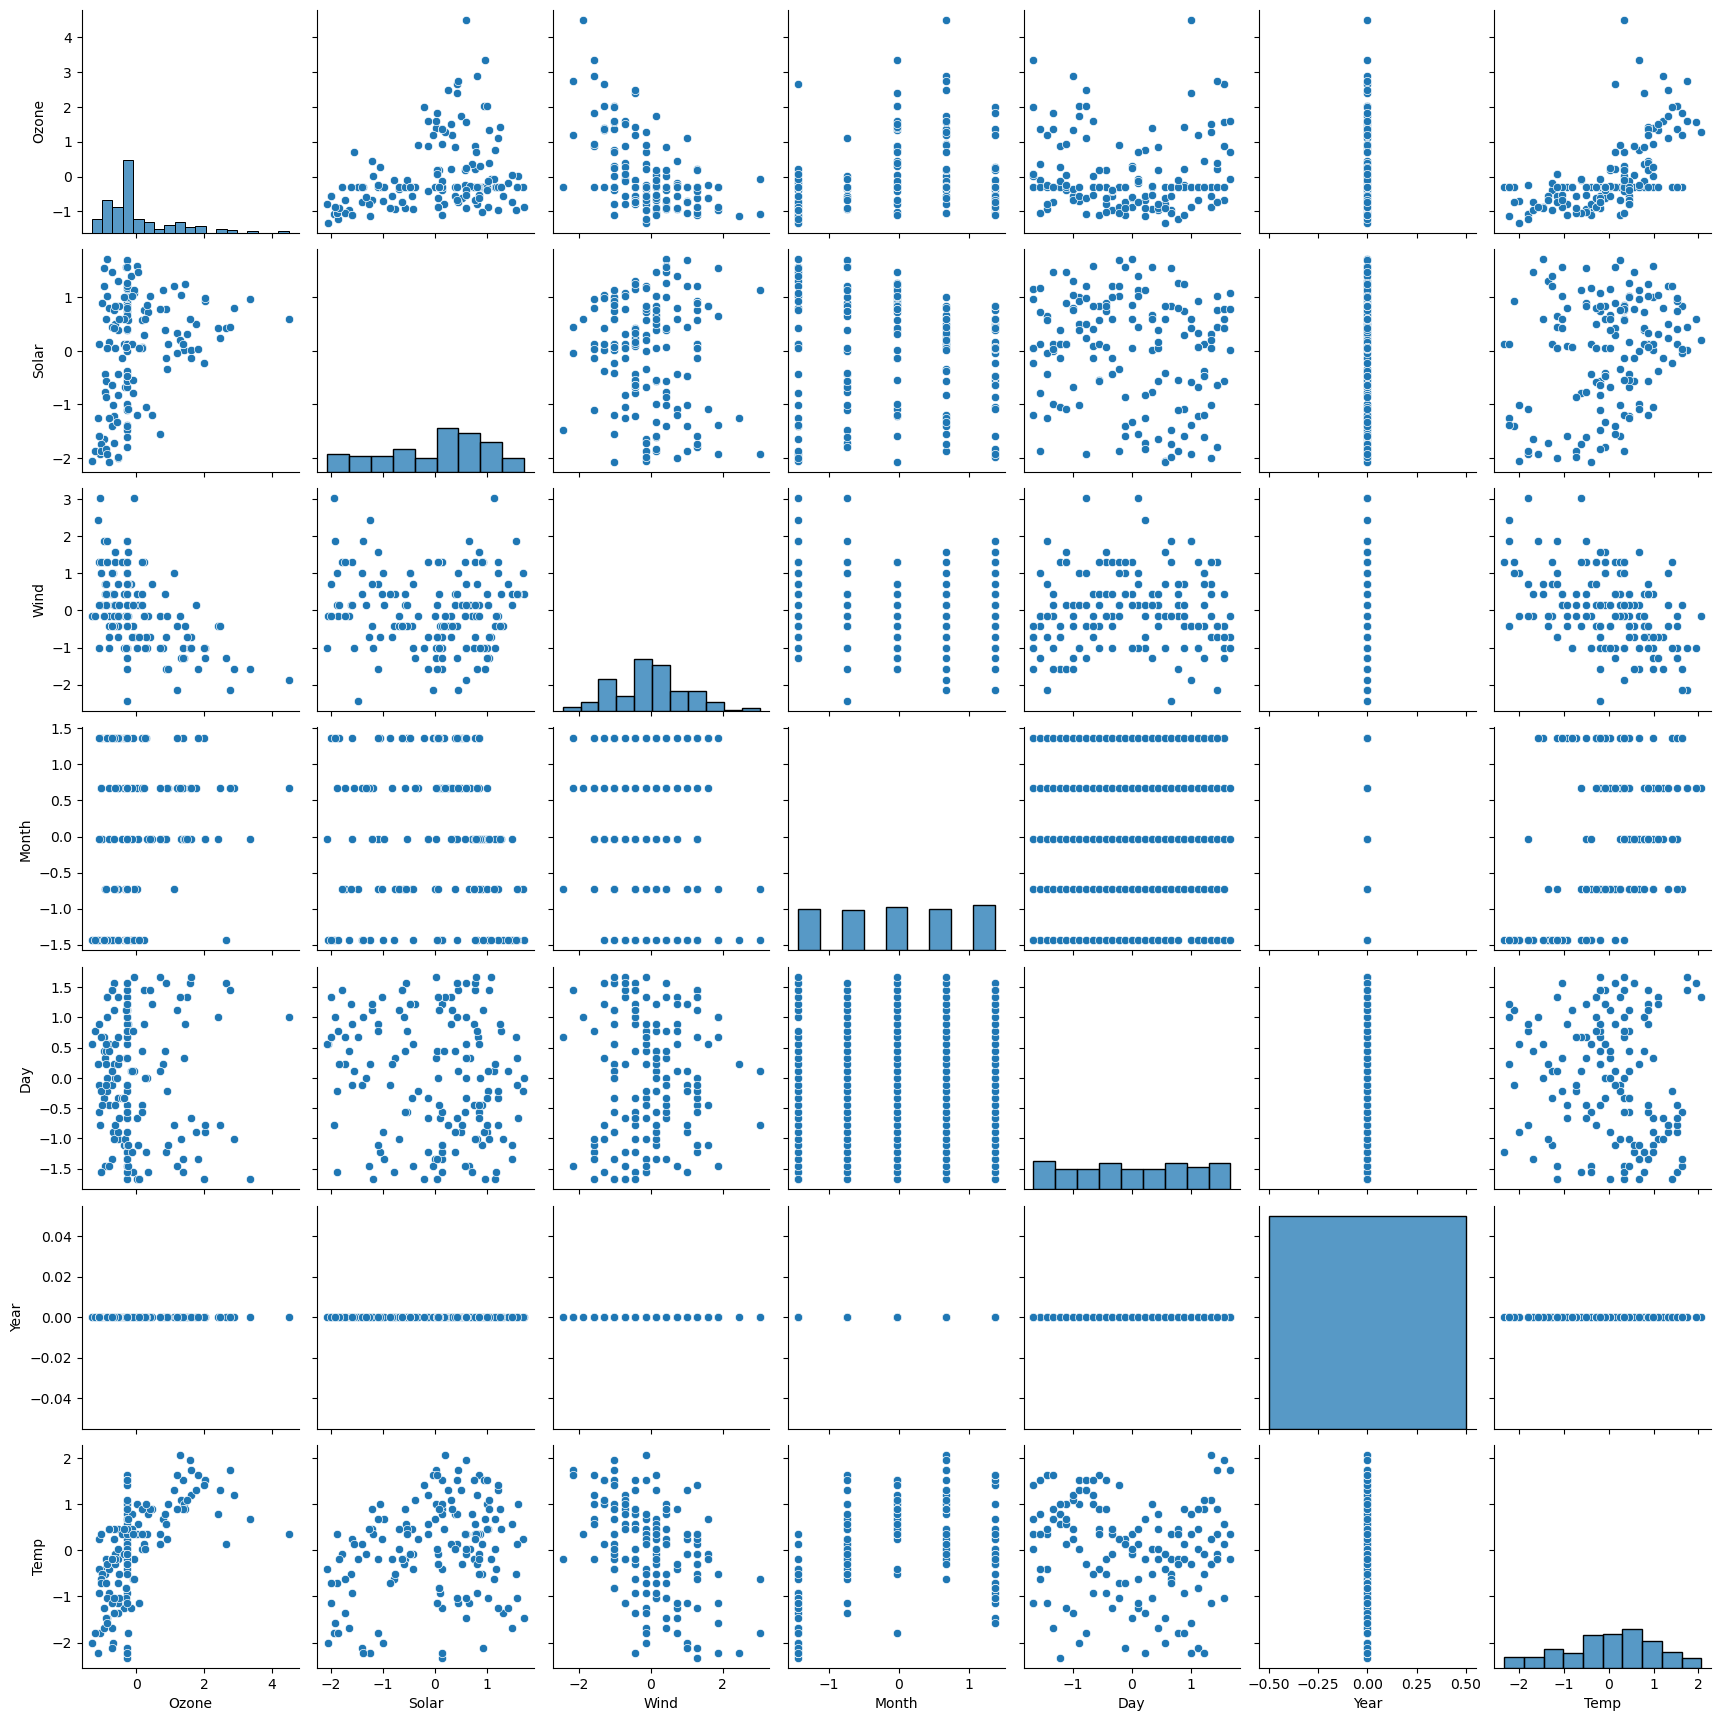

In [36]:
standardization_df=pd.DataFrame(numeric_columns,columns=['Ozone','Solar','Wind','Month','Day','Year','Temp'])
sns.pairplot(standardization_df)

In [40]:
standardization_df.describe().round(2)

,Ozone,Solar,Wind,Month,Day,Year,Temp
count,158.00,158.00,158.00,158.00,158.00,158.0,158.00
mean,-0.00,0.00,0.00,0.00,0.00,0.0,0.00
std,1.00,1.00,1.00,1.00,1.00,0.0,1.00
min,-1.32,-2.07,-2.44,-1.43,-1.67,0.0,-2.32
25%,-0.62,-0.68,-0.71,-0.73,-0.89,0.0,-0.61
50%,-0.29,0.13,-0.14,-0.03,-0.00,0.0,0.08
75%,0.21,0.80,0.65,0.67,0.89,0.0,0.67
max,4.50,1.71,3.03,1.37,1.67,0.0,2.06
